Using Your Own Connectivity
=====================================

This tutorial covers a basic mechanism for using your own connectivity data 
in TVB's scripting interface. It describes a simple text file based format
and how to load data from that format.

A Simple Text File Based Format
-------------------------------

In this tutorial we will use a "simple" text file based data format that is
supported by TVB. It consists of text files (optionally compressed) containing
the the main data elements that make up a Connectivity, eg. weights, 
tract-lengths, etc. This format is very simple but not particularly safe, in 
the sense that the lack of explicit meta-information means detailed consistency
checks of loaded data aren't really possible, so **be careful**...

The format is just a directory containing the following files (the contents, which
are described in detail below):
    
    info.txt
    weights.txt
    tract_lengths.txt
    cortical.txt
    centres.txt
    average_orientations.txt
    areas.txt

We can use bzip2 to compress each of these files, with the exception of the 
info.txt file, and everything will work the same. This is useful for saving 
storage space when we want to work with either very many or very large 
connectivity datasets.

A more detailed description of each file follows. A number of sample connectivity
data sets can be found in tvb_data.connectivity.

**info.txt**
    This file contains a summary about the connectivity matrix (eg, distance units, weights units), a vector to distinguish left 
    from right areas, etc.

**weights.txt**
    This file contains the connectome, that is a (un)weighted matrix whose values may represent units such as fibre density. 
    Zero entries in thsi matrix mean 'unconnected' areas.

**tract_lengths.txt**
    This file contains . 
    **NOTE:** *If no tract-length data is provided, TVB can calculate tract-lengths 
    based on the Euclidean distance between centres.*

**cortical.txt**
    This file contains a vector providing a means of distinguishing cortical from subcortical regions.

**centres.txt**
    This file contains the region labels (first columnn) and the list of Cartesian triplets (x,y,z) that specify 
    the spatial location rof each region.

**average_orientations.txt**
    This file contains the average 'normal vectors' of the dipoles (regions). They are derived from the cortical surface normal  
    vectors and used to compute the forward solutions of EEG and MEG. 

**areas.txt**
    This file contains a vector of length number of regions specifying the area in [mm2] that each region represents. 
    


Where To Put Your Data
----------------------

If you want to use relative paths to your data in scripts, then the data needs to be
in the tvb_data directory. So putting your data there can simplify things
and make your scripts more portable.

However, you can place your data any where you want, it just requires that you specify
absolute path names in your scripts.

Setup
-----

We'll first import some stuff we'll need via the "lab", this has the side
effect of turning off TVB's storage for us, which is, for the moment, 
necessary when using the scripting interface to TVB.

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *

   INFO  log level set to INFO
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan.WilsonCowan.state_variable_range = Const(field_type=<type 'dict'>, default={'I': array([0., 1.]), 'E': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Const(field_type=<type 'dict'>, default={'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.]), 'xi': array([-4.,  4.]), 'eta': array([-3.,  3.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.state_variable_range = Const(field_type=<type 'dict'>, default={'tau': array([ 2., 10.]), 'xi': array([-4.,  4.]), 'beta': array([-20.,  20.]), 'eta': arra

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.hopfield.Hopfield.state_variable_range = Const(field_type=<type 'dict'>, default={'x': array([-1.,  2.]), 'theta': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Const(field_type=<type 'dict'>, default={'y2': array([0., 2.]), 'g': array([-1.,  1.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y1': array([-20.,   2.]), 'x1': array([-2.,  1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Const(field_type=<type 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING  default contains values out of the declared domain. 

//anaconda/envs/tvb_library_git/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Loading Your Data
-----------------

To load your data we just need to specify its path 
when we create a Connectivity object. We'll use a very simple ("toy") connectivity dataset
called paupau, which is included in TVB, as our first example. This connectivity dataset 
consists of just 4 regions.

All we need to do is simply create a Connectivity object specifying the path to our data
in the call. This is just a string that can be either a relative path (w.r.t. 
tvb_data), or an absolute path to our data.

In [3]:
#Load the connectivity data in the directory tvb_data.connectivity.paupau
conn_pau = connectivity.Connectivity.from_file("paupau.zip")

WARNING  File 'hemispheres' not found in ZIP.


Where the use of os.path.join is for portability between operating systems, for example, it resolves
to "connectivity/paupau" on Linux and "connectivity\paupau" on windows.

We can now configure the Connectivity object we've just created and take a quick look
at the properties of our data using:

In [4]:
#Configure, to compute derived data, such as number_of_nodes and delays
conn_pau.configure()
conn_pau.summary_info

<bound method Connectivity.summary_info of <tvb.datatypes.connectivity.Connectivity object at 0x125dd8850>>

And we can look at simple matrix view of weights and tract-lengths data using plot_connectivity

<IPython.core.display.Javascript object>


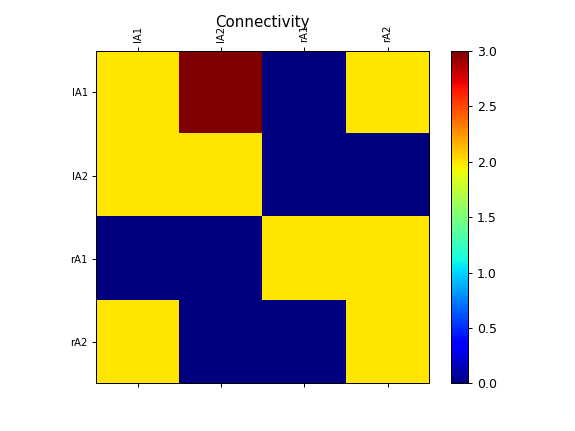

<IPython.core.display.Javascript object>


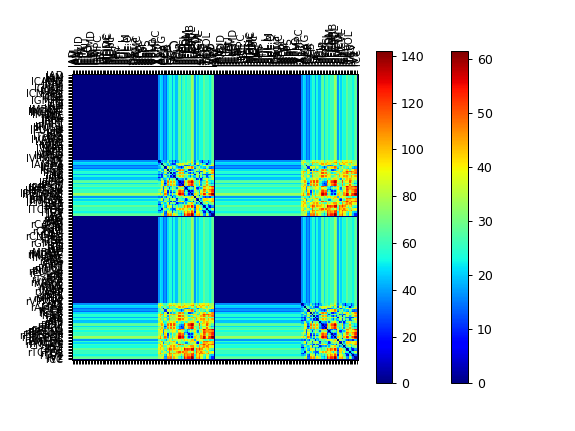

In [5]:
plot_connectivity(connectivity = conn_pau)

Multiple datasets in one
-------------------------

It is possible to reuse the majority of a dataset and have multiple pieces of 
data for one or more elements. That is, by default, when you create a Connectivity
object by pointing at a specific data directory, the data components are expected
to be in files with specific names, such as weights.txt.bz2. However, it is possible
for a specific connectivity data directory to contain multiple weights files as long
as they are consistent with the rest of the connectivity data. For example, in 
addition weights.txt.bz2 our directory may contain files named:

    weights_0.txt.bz2
    weights_bob.txt.bz2
    hfdbvaerut93483489.txt.bz2

thought that last one is a bad name as it's not clear what it contains.

The loading the connectivity specifying a particular weights would become:

    pau_path = os.path.join("connectivity", "paupau")
    conn_pau = connectivity.Connectivity(default = pau_path, weights_file = "weights_bob.txt.bz2")

A Larger Example Dataset
-------------------------

Load some more complicated data... to emphasise visualisation techniques

In [7]:
#Load the connectivity data in the directory tvb_data.connectivity.connectivity_190
conn_190 = connectivity.Connectivity.from_file("connectivity_192.zip")
#conn_190.default.reload(conn_190, os.path.join("connectivity", "o52r00_irp2008_hemisphere_both_subcortical_true_regions_190"))
#Configure, to compute derived data, such as number_of_nodes and delays
conn_190.configure()
conn_190.summary_info

WARNING  File 'hemispheres' not found in ZIP.


<bound method Connectivity.summary_info of <tvb.datatypes.connectivity.Connectivity object at 0x12631aa10>>

Again, we can just take a look at a matrix plot of weights and tract lengths

<IPython.core.display.Javascript object>


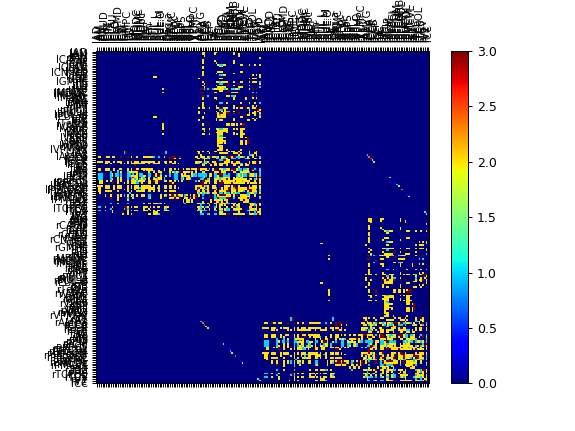

In [8]:
plot_connectivity(connectivity = conn_190)

Scaling, Transforming and Resampling
-------------------------------------

The Connectivity object includes a number of methods for scaling, transforming or resampling a connectivity.

**Scaling**
___________

Two simple types of scaling are supported and the ```scaling mode``` is the following: 
            
* **tract**: Scale by a value such that the maximum absolute value of a single connection is 1.
            
* **region**: Scale by a value such that the maximum absolute value of the cumulative input to any region is 1.

WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


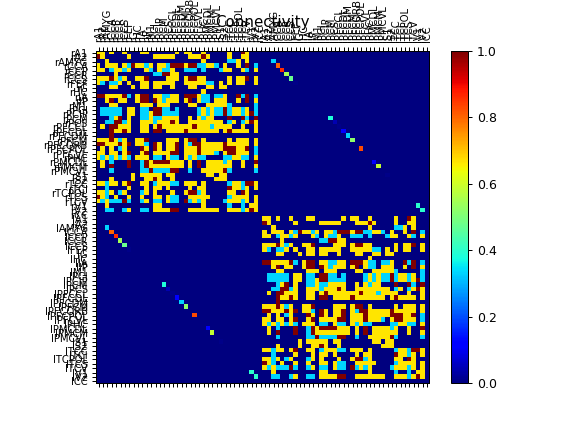

In [9]:
#Initialise a Connectivity object
orig_wm = connectivity.Connectivity.from_file()
orig_wm.configure()

scaled_wm = connectivity.Connectivity.from_file()
scaled_wm.configure()

#scale weights by the maximum aboslute value
scaled_wm.weights = orig_wm.scaled_weights(mode='tract')
plot_connectivity(scaled_wm, num="tract_mode", plot_tracts=False)

NOTE: Currently, multiple **tract** and/or **region** scalings without intermediate **none** scaling mode destroy the ability to recover the original un-scaled weights matrix.

<IPython.core.display.Javascript object>


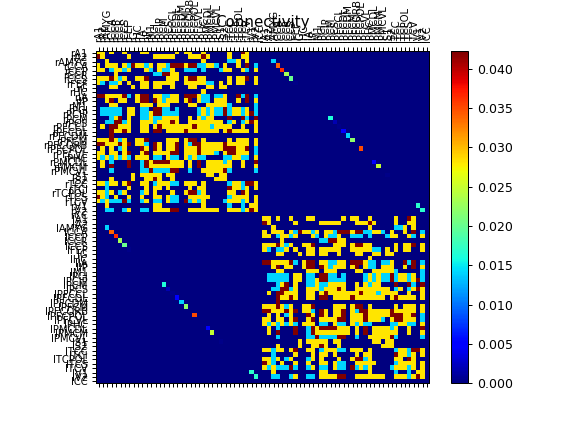

In [10]:
scaled_wm.weights = orig_wm.scaled_weights(mode='none')
scaled_wm.weights = orig_wm.scaled_weights(mode='region')
plot_connectivity(scaled_wm, num="region_mode", plot_tracts=False)

<IPython.core.display.Javascript object>


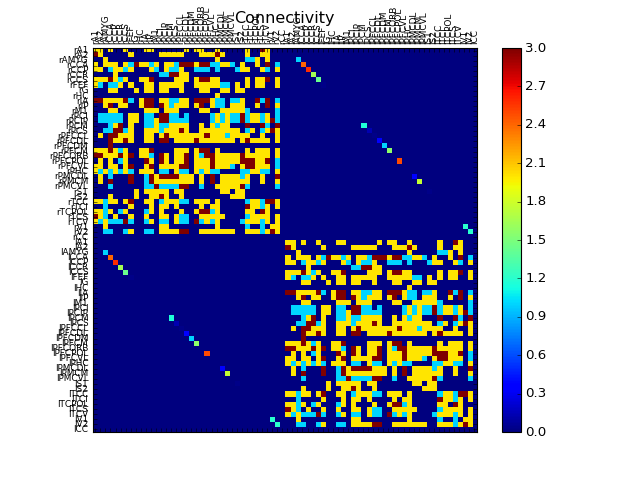

In [10]:
#undo scaling
scaled_wm.weights = orig_wm.scaled_weights(mode='none')
plot_connectivity(scaled_wm, num="default_mode", plot_tracts=False)

**Transforming**
_________________

These methods will affect either the topology or the distribution of the weights matrix. 

* **binarize matrix**: Sets all the non-zero values to 1. In other words it tyields the adjacency matrix.
* ** remove self-connections ** : Sets to zero all the elements of the main diagonal matrix.

NOTE: these methods do not provide a means to undo the changes


<IPython.core.display.Javascript object>


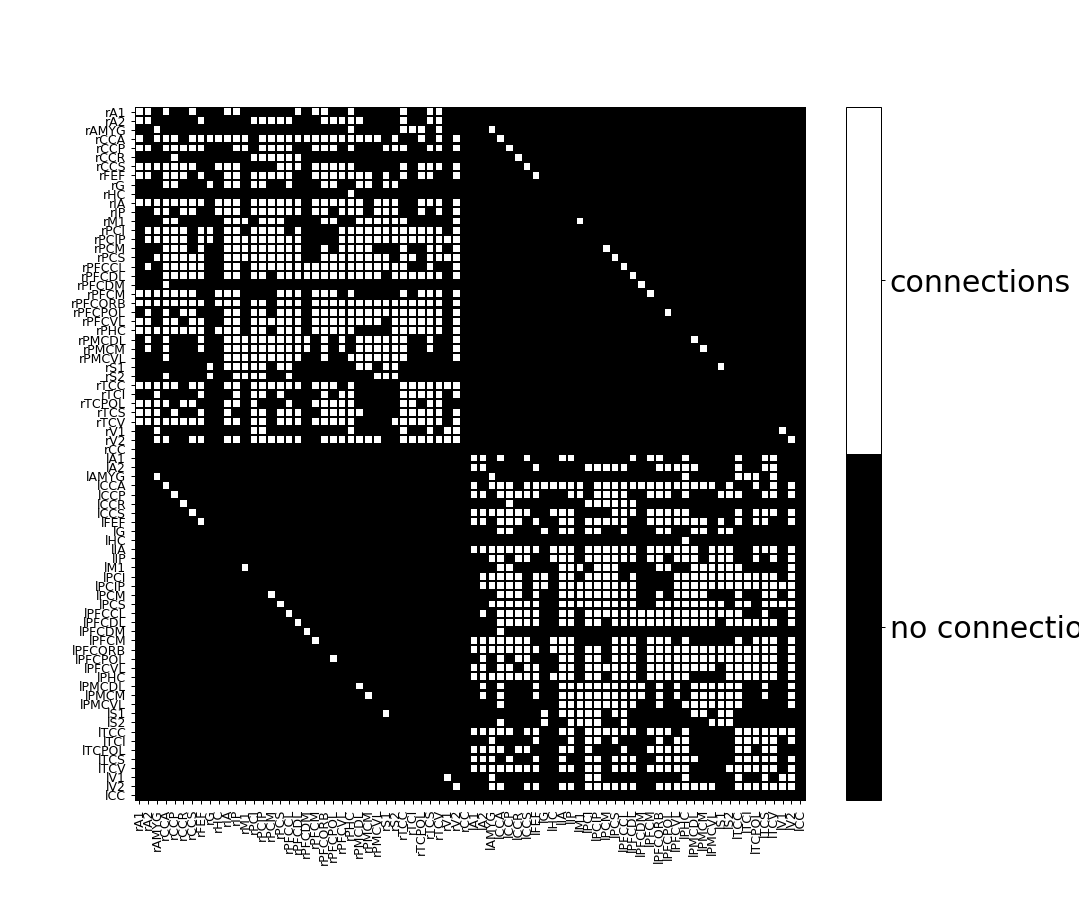

In [11]:
#binarize
scaled_wm.weights = orig_wm.transform_binarize_matrix()
plot_matrix(scaled_wm.weights, connectivity=scaled_wm, binary_matrix=True)
